In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
from pyproj import Proj, transform
import os

import rasterio
from rasterio.plot import show
import xarray as xr
import rioxarray

First check that the bounding box is over the catchment in question.

   FID                                           geometry
0    0  POLYGON ((-95.21039 29.50759, -96.21039 29.507...


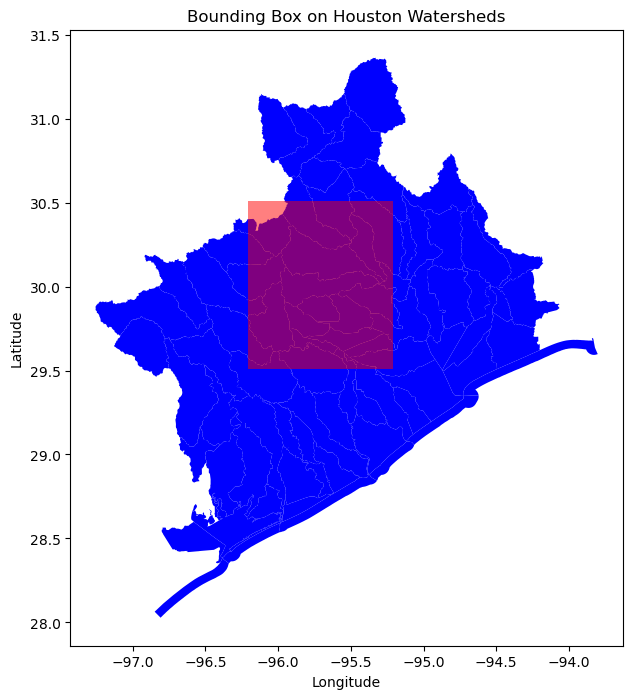

In [2]:
# Set up working directory
workspace = os.path.dirname(os.getcwd()) # current folder

# Load shapefile
shapefile_path = "%s/data/huc10/centroid_bounding_box.shp" % workspace
bbox_gdf = gpd.read_file(shapefile_path)
print(bbox_gdf)

# Load  shapefile
boundary_path = "%s/data/huc10/HGAC_HUC_10_Watersheds/HGAC_HUC_10_Watersheds.shp" % workspace
boundary_gdf = gpd.read_file(boundary_path)

# Reproject the watersheds to WGS84
boundary_wgs84 = boundary_gdf.to_crs(4326)

# # Save the reprojected watersheds
# wgs84_watersheds_path = "%s/data//huc10/watersheds_WGS84.shp" % workspace
# boundary_wgs84.to_file(wgs84_watersheds_path)

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the coastline
boundary_wgs84.plot(ax=ax, color='blue', linewidth=0.5)

# Plot the bounding box
bbox_gdf.plot(ax=ax, color='red', linewidth=2, alpha=0.5)

# Set the title and axis labels
ax.set_title("Bounding Box on Houston Watersheds")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# # Adjust the plot limits if needed
# ax.set_xlim(min_lon - 0.5, max_lon + 0.5)
# ax.set_ylim(min_lat - 0.5, max_lat + 0.5)

# Show the plot
plt.show()

We have a bounding box in WGS84 coordinates that has the watershed inside. The next thing to do is check the DEM.

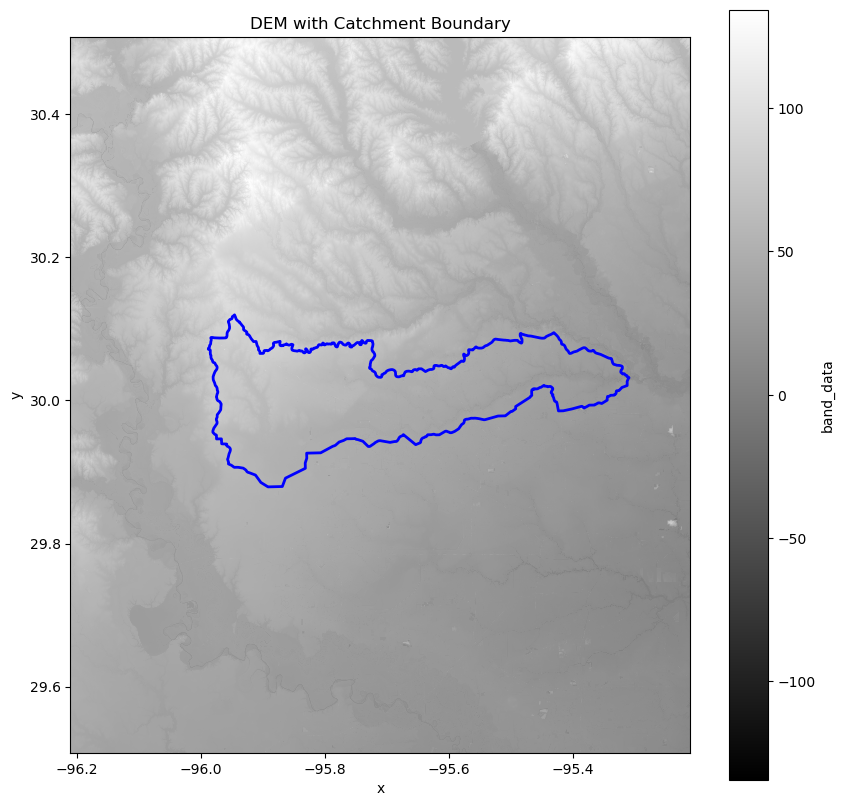

In [3]:
# Paths
dem_path = f"{workspace}/data/dem/USGS_30m_DEM.tif"

# Open the DEM using xarray and rioxarray
dem = xr.open_dataarray(dem_path)

# Plot DEM with watershed boundary
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the DEM
dem.plot(ax=ax, cmap='gray')  # xarray's plot function works similar to matplotlib

# Load watershed shapefile using geopandas
gdf = gpd.read_file(watershed_shapefile_path)

# Plot the boundary
gdf.boundary.plot(ax=ax, color='blue', linewidth=2)

plt.title("DEM with Catchment Boundary")
plt.show()

# Access the DEM data as a NumPy array
dem_raster = dem.values

# # Print the DEM raster data
# print(dem_raster)


Continuing with the static data, get Polaris


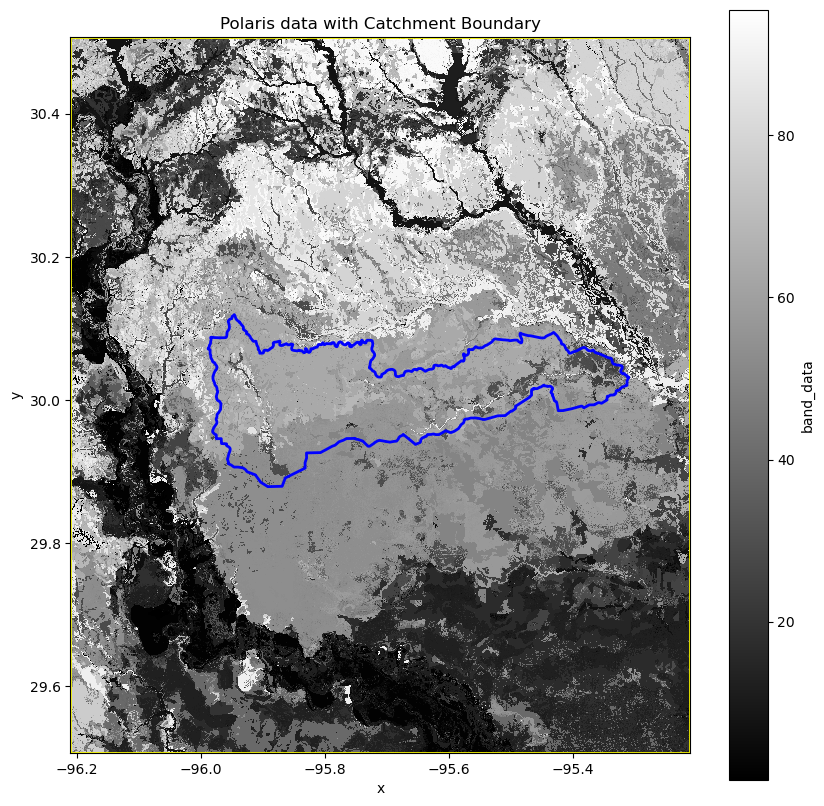

[[[76.5 76.5 62.5 ... 19.5 12.5 12.5]
  [76.5 62.5 74.5 ... 12.5 16.5 16.5]
  [57.5 76.5 76.5 ... 12.5 12.5 12.5]
  ...
  [81.5 80.5 81.5 ... 78.5 79.5 78.5]
  [81.5 81.5 81.5 ... 79.5 72.5 78.5]
  [81.5 81.5 81.5 ... 78.5 72.5 79.5]]]


In [4]:
# Paths
polaris_ex_path = f"{workspace}/data/polaris/processed/sand/cropped/cropped_sand_0_5.tif"
watershed_shapefile_path = f"{workspace}/data/huc10/cypress_creek_watershed.shp"
bbox_shapefile_path = f"{workspace}/data/huc10/centroid_bounding_box.shp"

polaris = xr.open_dataarray(polaris_ex_path)

fig, ax = plt.subplots(figsize=(10, 10))

polaris.sel(band=1).plot(ax=ax, cmap='gray')  

# Plot the catchment boundary
gdf.boundary.plot(ax=ax, color="blue", linewidth=2)
bbox_gdf.boundary.plot(ax=ax, color="yellow", linewidth=2)

plt.title("Polaris data with Catchment Boundary")
plt.show()

# Access the raster data as a NumPy array
polaris_raster = polaris.values

print(polaris_raster)

Downloaded NLCD by modifying an existing script from the LandCoverDownloader Github.

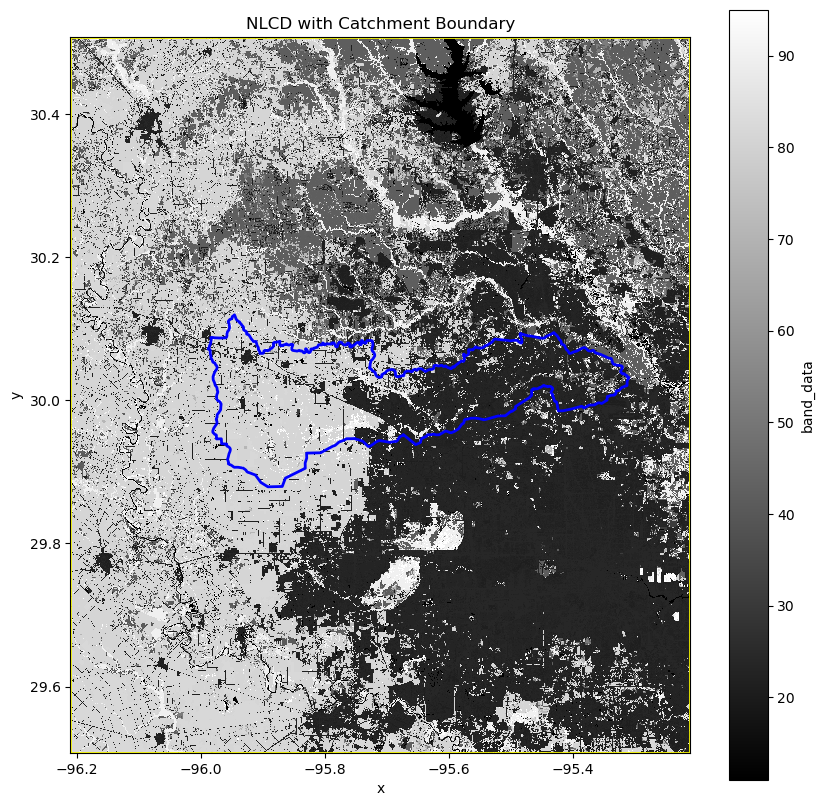

[[[90. 90. 52. ... 42. 42. 42.]
  [90. 90. 52. ... 43. 42. 42.]
  [90. 90. 52. ... 42. 42. 43.]
  ...
  [82. 82. 82. ... 21. 21. 21.]
  [82. 82. 82. ... 22. 21. 21.]
  [21. 82. 82. ... 22. 22. 21.]]]


In [25]:
nlcd_path = f"{workspace}/data/nlcd/resampled_nlcd_2016_cropped.tif"

# Open NLCD using xarray and rioxarray
nlcd = xr.open_dataarray(nlcd_path)

# Plot NLCD land cover data with watershed and bbox boundaries
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the NLCD data
nlcd.plot(ax=ax, cmap='gray')  # Plot NLCD data as a grayscale raster

# Load watershed shapefile
gdf = gpd.read_file(watershed_shapefile_path)

# Plot the catchment boundary
gdf.boundary.plot(ax=ax, color="blue", linewidth=2)

# Load bbox shapefile and plot it
bbox_gdf = gpd.read_file(bbox_shapefile_path)
bbox_gdf.boundary.plot(ax=ax, color="yellow", linewidth=2)

plt.title("NLCD with Catchment Boundary")
plt.show()

# Access the raster data as a NumPy array
nlcd_raster = nlcd.values

# Print the NLCD raster data
print(nlcd_raster)

Take a look at SMAP data so we can organize it.

An error occurred: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).


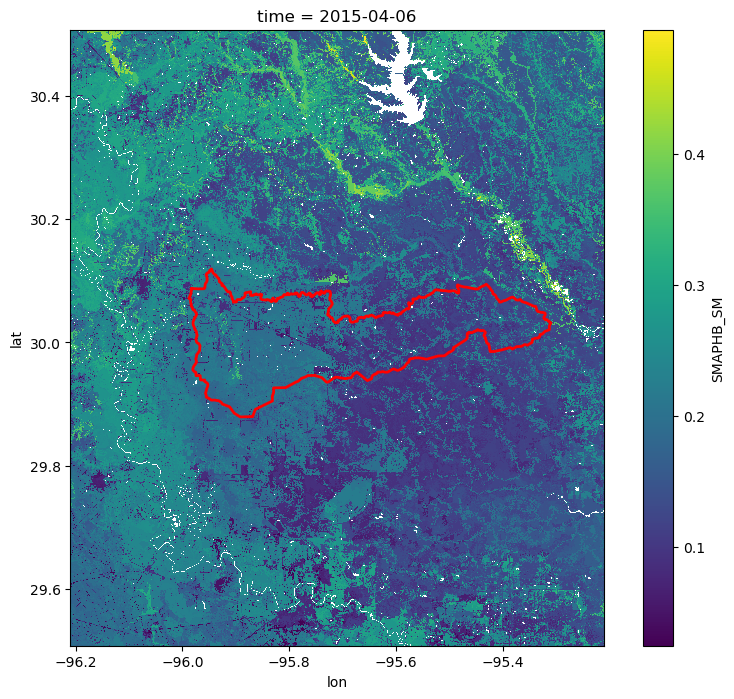

In [6]:
smap_ex_fp = f'{workspace}/data/daily/2015-04-06/SMAPHB_SM_2015-04-06.nc'

try:
    # Open the SMAP dataset
    smaphb_sample = xr.open_dataarray(smap_ex_fp)

    # Load the watershed shapefile for boundary plotting
    gdf = gpd.read_file(watershed_shapefile_path)

    # Create a figure and axes for plotting
    fig, ax = plt.subplots(figsize=(10, 8))

    # Plot the soil moisture grid
    smaphb_sample.plot.imshow(ax=ax, cmap='viridis')

    # Plot the watershed boundary
    gdf.boundary.plot(ax=ax, color='red', linewidth=2)

    # Set the colorbar label
    plt.colorbar(label="m³/m³")

    # Set the title and axis labels
    plt.title('Soil Moisture Grid with Watershed Boundary')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')

    # Show the plot
    plt.show()

except Exception as e:
    print(f"An error occurred: {e}")

<xarray.DataArray 'SMAPHB_SM' (lat: 3, lon: 3)> Size: 36B
[9 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 24B 29.74 30.2 30.47
  * lon      (lon) float64 24B -95.98 -95.52 -95.25
    time     datetime64[ns] 8B ...
An error occurred: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).


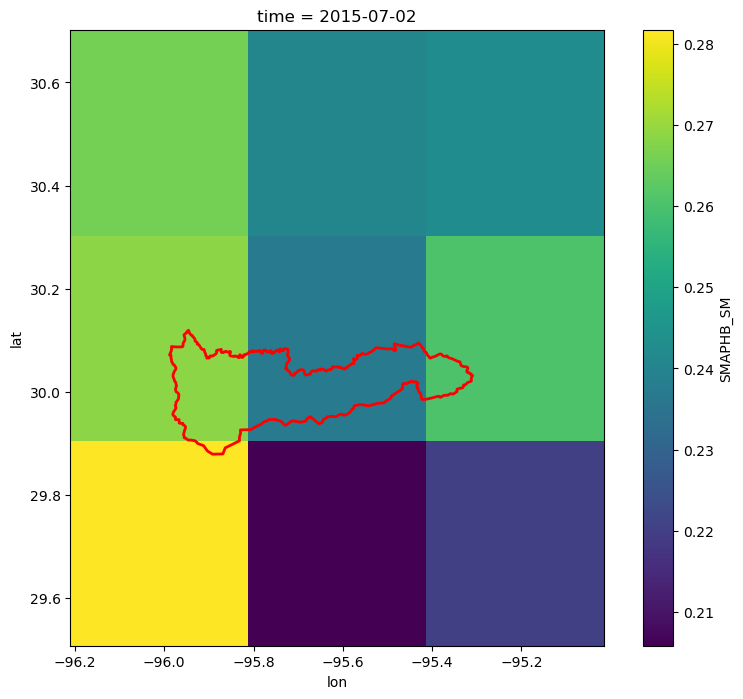

In [7]:
smap_ex_upscaled_fp = f"{workspace}/data/daily/2015-07-02/SMAPHB_SM_2015-07-02_50km.nc"

try:
    # Open the SMAP dataset with the h5netcdf engine
    smaphb_sample_50km = xr.open_dataarray(smap_ex_upscaled_fp)

    # Print the DataArray to check
    print(smaphb_sample_50km)

    # Create a figure and axes
    fig, ax = plt.subplots(figsize=(10, 8))

    # Plot the soil moisture grid
    smaphb_sample_50km.plot.imshow(ax=ax, cmap='viridis')

    # Plot the watershed boundary
    gdf.boundary.plot(ax=ax, color='red', linewidth=2)

    # Set the colorbar label
    plt.colorbar(label="m³/m³")

    # Set the title and axis labels
    plt.title('Soil Moisture Grid with Watershed Boundary')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')

    # Show the plot
    plt.show()

except Exception as e:
    print(f"An error occurred: {e}")

Take a look at IMERG data.

<xarray.DataArray 'precipitation' (lon: 10, lat: 10)> Size: 400B
[100 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 40B -96.15 -96.05 -95.95 ... -95.45 -95.35 -95.25
  * lat      (lat) float64 80B 29.55 29.65 29.75 29.85 ... 30.25 30.35 30.45
    time     datetime64[ns] 8B 2015-04-13
Attributes:
    units:      mm/day
    long_name:  Daily mean precipitation rate (combined microwave-IR) estimat...


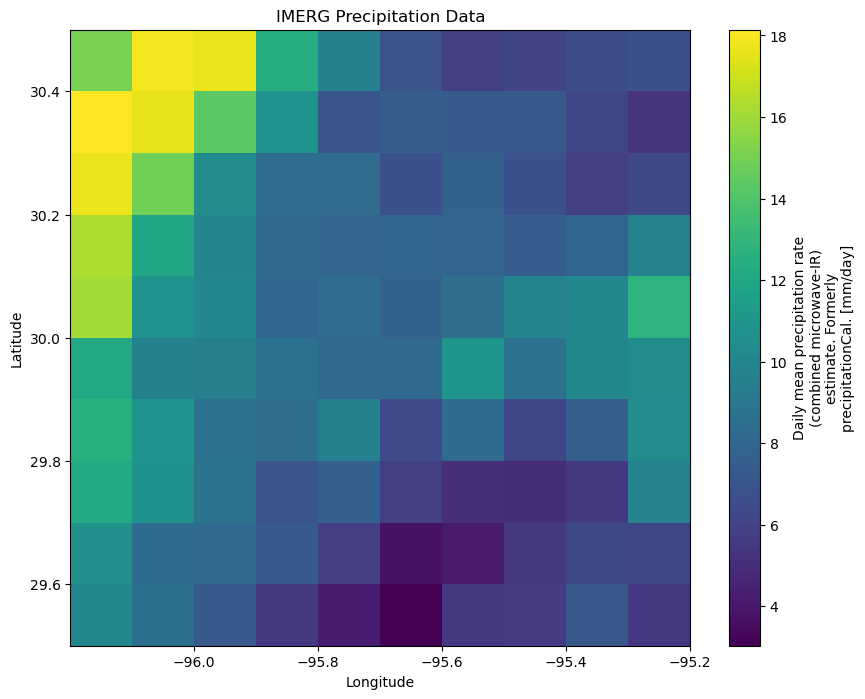

In [17]:
# Load the NetCDF file
imerg_ds = xr.open_dataset(f'{workspace}/data/daily/2015-04-13/cropped_3B-DAY.MS.MRG.20150413-S000000-E235959.V07B.nc4') 

precip = imerg_ds["precipitation"].isel(time=0)

print(precip)

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Plot latitude vs longitude
precip.plot(x='lon', y='lat', ax=ax, cmap='viridis')

# Set the title and axis labels
plt.title('IMERG Precipitation Data')
plt.ylabel('Latitude')
plt.xlabel('Longitude')

# Show the plot
plt.show()

<xarray.DataArray 'precipitation' (y: 3600, x: 3600)> Size: 52MB
[12960000 values with dtype=float32]
Coordinates:
  * x        (x) float64 29kB -96.2 -96.2 -96.2 -96.2 ... -95.2 -95.2 -95.2
  * y        (y) float64 29kB 30.5 30.5 30.5 30.5 30.5 ... 29.5 29.5 29.5 29.5
    time     datetime64[ns] 8B 2015-04-13
Attributes:
    units:         mm/day
    long_name:     Daily mean precipitation rate (combined microwave-IR) esti...
    grid_mapping:  spatial_ref


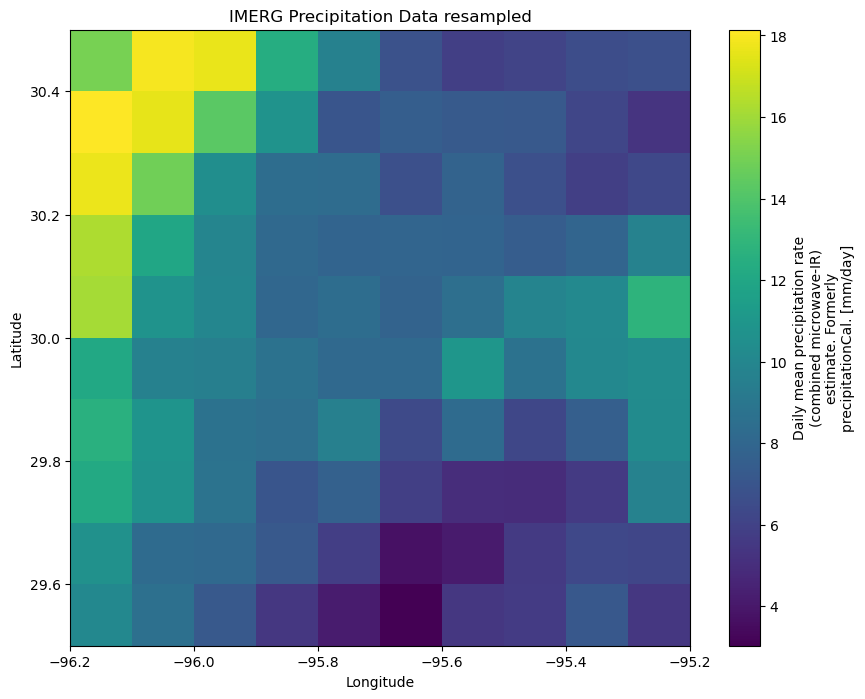

In [19]:
# Do the same for the resampled IMERG
imerg_resampled_ds = xr.open_dataset(f'{workspace}/data/daily/2015-04-13/IMERG_2015-04-13_resampled_30m.nc') 

precip_resampled = imerg_resampled_ds["precipitation"].isel(time=0)

print(precip_resampled)

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Plot latitude vs longitude
precip_resampled.plot(x='x', y='y', ax=ax, cmap='viridis')

# Set the title and axis labels
plt.title('IMERG Precipitation Data resampled')
plt.ylabel('Latitude')
plt.xlabel('Longitude')

# Show the plot
plt.show()

In [21]:
print(smaphb_sample_50km)

<xarray.DataArray 'SMAPHB_SM' (lat: 3, lon: 3)> Size: 36B
array([[0.281699, 0.205853, 0.220237],
       [0.268482, 0.236774, 0.260511],
       [0.265887, 0.240557, 0.242777]], dtype=float32)
Coordinates:
  * lat      (lat) float64 24B 29.74 30.2 30.47
  * lon      (lon) float64 24B -95.98 -95.52 -95.25
    time     datetime64[ns] 8B 2015-07-02


In [24]:
print("IMERG 10 km: ",precip.shape) # imerg
print("IMERG resampled 30 m: ",precip_resampled.shape) # imerg
print("POLARIS: ", polaris_raster.shape)
print("DEM: ", dem_raster.shape) # good, should be 3600 x 3600 if 30 m res (111000 m / 30 m = 3700)
print("SMAP 30 m: ", smaphb_sample.shape)
print("SMAP 50 km: ", smaphb_sample_50km.shape)
print("NLCD 30 m: ", nlcd.shape)

IMERG 10 km:  (10, 10)
IMERG resampled 30 m:  (3600, 3600)
POLARIS:  (1, 3600, 3600)
DEM:  (1, 3600, 3600)
SMAP 30 m:  (3600, 3600)
SMAP 50 km:  (3, 3)
NLCD 30 m:  (1, 4285, 3711)


## To do

- Reproject SMAP data
- Delete date folders for which the data aren't complete
    - 80% valid points
    - Do the same thing for precipitation data
    - Only keep folders where you have both - so do SM first and then just check those dates for precip
- Try to open Polaris data with xarray to crop instead of rasterio to fix inconsistent dimensions
    - Had been using Rasterio because it's a tiff instead of netcdf
- Match 0.1-deg resolution IMERG to other files
    - Leave it be for now; may need to downscale to 4 km later
    - Should be fine to have non-matching degrees with cLSTMs
- Use True's suggested API to get MRMS rainfall for 2019/10 event

## Fix map layers

- Error: shapefile doesn't exist
    - I have my own, so try substitiuting that in

- HEC-RAS model - get the model to work

